**Purpose**: Analyze the Google Analytics stats of Galaxy Training Material website

In [1]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd

from dateutil import relativedelta

Usage: on Google Analytics

1. Go to **Customization** then **Custom Reports**
2. Open each report and for each
    1. Select time from Nov 1, 2018 to today
    2. Show 50 rows
    3. Export in CSV in `../data/topics_analytics` folder following the name `<topic>.csv`

In [2]:
str(datetime.datetime.now())

'2020-12-08 11:18:09.272827'

In [3]:
# create range for every month
delta = 1
start = datetime.datetime(year=2018, month=11, day=1)
end = datetime.datetime.now()
r = relativedelta.relativedelta(end, start)
month_nb = 12*r.years + r.months + 1
months = pd.date_range(start, periods=month_nb, freq='M')
month_idx = pd.PeriodIndex(months)

Number of months for the extraction

In [4]:
month_nb

26

In [5]:
def get_user_stat(fp, name):
    """Extract and prepare user stat
    
    :param fp: path to CSV extracted from Google Analytics
    :param name: name of resources on which users are extracted

    :return: dataframe with 2 columns (month index and number of users)
    """
    df = pd.read_csv(fp, header=5)
    # format columns
    df["Month Index"] = df["Month Index"].astype(int)
    if df['Users'].dtypes != 'int':
        df["Users"] = df["Users"].str.replace(',', '').astype(int)
    #
    return df.rename(columns = {'Users': name})

In [6]:
all_users = (pd.DataFrame({'Month Index': range(month_nb)}, index=month_idx)
    .reset_index()
    .merge(get_user_stat('../data/audience_statistics.csv', 'All'), how='outer')
    .fillna(0)
    .set_index('index')
    .drop(columns=['Month Index']))
all_users.head()

,All
index,
2018-11,1991.0
2018-12,5933.0
2019-01,6507.0
2019-02,7402.0
2019-03,9850.0


In [7]:
all_users.All.mean()

16373.115384615385

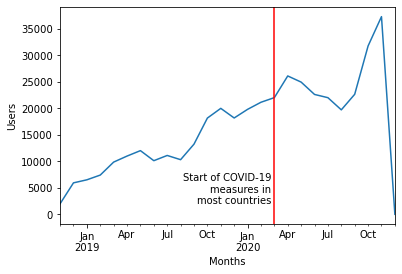

In [8]:
plt.figure()
all_users.All.plot()
plt.xlabel('Months')
plt.ylabel('Users')
plt.axvline('2020-03-01', color='red')
plt.text('2020-03-01', 2000, 'Start of COVID-19 \nmeasures in \nmost countries ', horizontalalignment='right')
plt.show()

In [9]:
topic_users = (pd.DataFrame({'Month Index': range(month_nb)}, index=month_idx)
    .reset_index()
    .merge(get_user_stat('../data/topics_analytics/introduction.csv', 'Introduction to Galaxy Analyses'), how='outer')
    .merge(get_user_stat('../data/topics_analytics/assembly.csv', 'Assembly'), how='outer')
    .merge(get_user_stat('../data/topics_analytics/climate.csv', 'Climate'), how='outer')
    .merge(get_user_stat('../data/topics_analytics/computational-chemistry.csv', 'Computational chemistry'), how='outer')
    .merge(get_user_stat('../data/topics_analytics/ecology.csv', 'Ecology'), how='outer')
    .merge(get_user_stat('../data/topics_analytics/epigenetics.csv', 'Epigenetics'), how='outer')
    .merge(get_user_stat('../data/topics_analytics/genome-annotation.csv', 'Genome Annotation'), how='outer')
    .merge(get_user_stat('../data/topics_analytics/imaging.csv', 'Imaging'), how='outer')
    .merge(get_user_stat('../data/topics_analytics/metabolomics.csv', 'Metabolomics'), how='outer')
    .merge(get_user_stat('../data/topics_analytics/metagenomics.csv', 'Metagenomics'), how='outer')
    .merge(get_user_stat('../data/topics_analytics/proteomics.csv', 'Proteomics'), how='outer')
    .merge(get_user_stat('../data/topics_analytics/sequence-analysis.csv', 'Sequence analysis'), how='outer')
    .merge(get_user_stat('../data/topics_analytics/statistics.csv', 'Statistics and machine learning'), how='outer')
    .merge(get_user_stat('../data/topics_analytics/transcriptomics.csv', 'Transcriptomics'), how='outer')
    .merge(get_user_stat('../data/topics_analytics/variant-analysis.csv', 'Variant Analysis'), how='outer')
    .merge(get_user_stat('../data/topics_analytics/visualisation.csv', 'Visualization'), how='outer')
               
    .merge(get_user_stat('../data/topics_analytics/galaxy-interface.csv', 'User Interface and Data Manipulation'), how='outer')
               
    .merge(get_user_stat('../data/topics_analytics/admin.csv', 'Galaxy Server administration'), how='outer')
    .merge(get_user_stat('../data/topics_analytics/dev.csv', 'Development in Galaxy'), how='outer')
               
    .merge(get_user_stat('../data/topics_analytics/contributing.csv', 'Contributing to the Galaxy Training Material'), how='outer')
    .merge(get_user_stat('../data/topics_analytics/instructors.csv', 'Teaching and Hosting Galaxy training'), how='outer')
    .fillna(0)
    .set_index('index')
    .drop(columns=['Month Index']))
topic_users.head()

,Introduction to Galaxy Analyses,Assembly,Climate,Computational chemistry,Ecology,Epigenetics,Genome Annotation,Imaging,Metabolomics,Metagenomics,...,Sequence analysis,Statistics and machine learning,Transcriptomics,Variant Analysis,Visualization,User Interface and Data Manipulation,Galaxy Server administration,Development in Galaxy,Contributing to the Galaxy Training Material,Teaching and Hosting Galaxy training
index,,,,,,,,,,,,,,,,,,,,,
2018-11,679.0,131.0,0.0,0.0,0.0,49.0,103.0,8.0,11.0,252.0,...,353.0,58.0,1245.0,550.0,0.0,0.0,137.0,31.0,24.0,9.0
2018-12,1691.0,401.0,0.0,1.0,0.0,185.0,291.0,7.0,25.0,665.0,...,948.0,69.0,1983.0,461.0,0.0,0.0,316.0,83.0,46.0,23.0
2019-01,1764.0,557.0,0.0,0.0,1.0,203.0,539.0,10.0,36.0,717.0,...,1223.0,153.0,1436.0,598.0,0.0,0.0,492.0,132.0,82.0,23.0
2019-02,1799.0,568.0,0.0,0.0,0.0,260.0,766.0,22.0,45.0,871.0,...,1395.0,166.0,1644.0,600.0,0.0,0.0,551.0,120.0,103.0,23.0
2019-03,2125.0,709.0,0.0,1.0,1.0,244.0,1017.0,34.0,59.0,1053.0,...,1695.0,169.0,2561.0,831.0,0.0,0.0,693.0,140.0,107.0,28.0


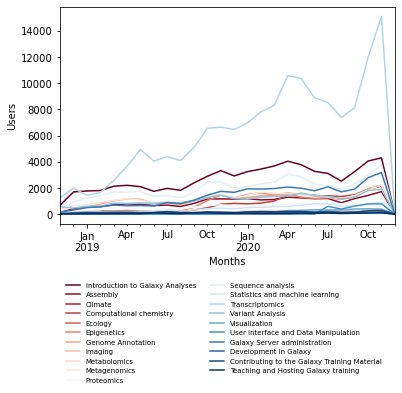

In [10]:
fig, ax = plt.subplots()
topic_users.plot(ax=ax, colormap='RdBu')
plt.xlabel('Months')
plt.ylabel('Users')
ax.legend(
    loc='center left',
    bbox_to_anchor=(0, -0.5),
    frameon=False,
    ncol=2,
    fontsize='x-small')

In [11]:
topic_users.iloc[-1].sort_values()

Introduction to Galaxy Analyses                 0.0
Development in Galaxy                           0.0
Galaxy Server administration                    0.0
User Interface and Data Manipulation            0.0
Visualization                                   0.0
Variant Analysis                                0.0
Transcriptomics                                 0.0
Statistics and machine learning                 0.0
Sequence analysis                               0.0
Contributing to the Galaxy Training Material    0.0
Proteomics                                      0.0
Metabolomics                                    0.0
Imaging                                         0.0
Genome Annotation                               0.0
Epigenetics                                     0.0
Ecology                                         0.0
Computational chemistry                         0.0
Climate                                         0.0
Assembly                                        0.0
Metagenomics